
## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Classification, Clustering using scikit-learn</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Wednesday, October 3 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about what Machine Learning models are, how do they work, what criteria you choose to choose a model, how accuracy matters and how error is calculated and so on. We will be using scikit-learn to examine a Machine Learning model. 

In this Project, we are trying to analyze the data of absenteeism at work. There is one csv file in the dataset. We will analyse how different features influence the model. On what criteria features are chosen and how model are chosen for a certain task. 

The dataset description is given in the end of the document. Also, try to comment your code.

## What to Turn In:

This Jupyter notebook with answers to each Task namely - 
    <p> <b> Task 1 </b> - Reading data and splitting between train and test. </p>
    <p> <b> Task 2 </b> - PCA application for analyze different features. Three plots - bmi vs absenteeism, transportation expense vs absenteeism and age vs absenteeism. </p>
    <p> <b> Task 3 </b> - Machine Learning  Models training for to predict if a person will be absent given the features. </p>
    <p> <b> Task 4 </b> - Clustering task - cluster people in different groups of absent reasons. </p>

A reported description in each answer for the task in the notebook iteself which will include explanation for what features were correlated and what model was used and what accuracy it gave.


# Task 1
First, you need to split the data into training and testing(functionality directly present in sklearn) in the ratio 80:20.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#read excel file
df=pd.read_excel("Absenteeism_at_work.xls")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [2]:
header=df.columns.values.tolist()
header

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [3]:
#Read csv file
df1=pd.read_csv("Absenteeism_at_work.csv",header=None)
df1.columns = df1.iloc[0]
df1.drop(df1.head(1).index, inplace=True)
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
2,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
3,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
4,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
5,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
from sklearn.model_selection import train_test_split
#split train and test sets
x, y = df.iloc[:, 1:-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = \
    train_test_split(x.astype(float), y.astype(float), test_size=0.2, random_state=0)

In [49]:
X_train.shape

(518, 19)

## 1.Read file as dataframe  2.Set Absenteeism time in hours as label column and other columns as features except for ID. 3.Split train and test sets by using sklearn package.

# Task 2

You have to find correlation between absenteeism and 3 different features namely bmi, transportation expense and age. Plot scatter plots for each feature and absenteeism.

In [4]:
a=df['Absenteeism time in hours'].values
b=df['Transportation expense'].values
c=df['Age'].values
d=df['Body mass index'].values

In [40]:
np.corrcoef(b,a)

array([[1.        , 0.02758463],
       [0.02758463, 1.        ]])

Text(0,0.5,'Absenteeism time in hours')

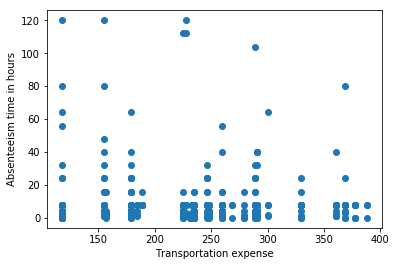

In [32]:
plt.scatter(b,a)
plt.xlabel('Transportation expense')
plt.ylabel('Absenteeism time in hours')

In [33]:
np.corrcoef(c,a)

array([[1.       , 0.0657597],
       [0.0657597, 1.       ]])

Text(0,0.5,'Absenteeism time in hours')

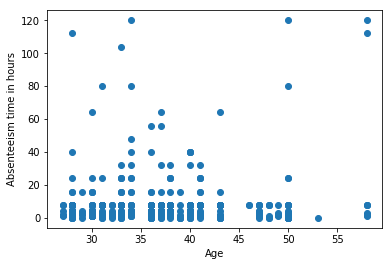

In [36]:
plt.scatter(c,a)
plt.xlabel('Age')
plt.ylabel('Absenteeism time in hours')

In [5]:
np.corrcoef(d,a)

array([[ 1.        , -0.04971948],
       [-0.04971948,  1.        ]])

Text(0,0.5,'Absenteeism time in hours')

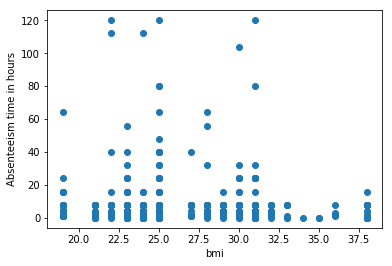

In [6]:
plt.scatter(d,a)
plt.xlabel('bmi')
plt.ylabel('Absenteeism time in hours')

# 1.Extract values of absenteeism, bmi, transportation expense and age as numpy arrays. 2.Calculate correlation of absenteeism and each of others by corrcoef(). 3. Plot them using plt.scatter()

# Task 3

Perform PCA and pick enough PCs to explain at least (60%) of the variance. If you need more than two PCs to get to 60% then do so. Check how many PCs are needed to get 60%. Now train your model based the PC features you picked (using the training set) which predicts absenteeism in hours given the features. This should be done using scikit-learn library. Evaluate (using the test-set) the models we discussed in class to see which gives you the best performance (accuracy). The different models could be for ex- logistic regression or gradient descent. This task is basically for you to learn about different models, theri accuracy and PCA. There is no right and wrong answer.

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [71]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.76524498e-01, 1.21123956e-01, 1.01008835e-01, 8.06580038e-02,
       7.33361378e-02, 6.54491497e-02, 5.79537518e-02, 5.31788826e-02,
       5.02022475e-02, 4.21352369e-02, 4.07766309e-02, 3.35139242e-02,
       2.41630370e-02, 2.20561548e-02, 2.14037904e-02, 1.57359738e-02,
       1.24624247e-02, 8.16705051e-03, 1.50313937e-04])

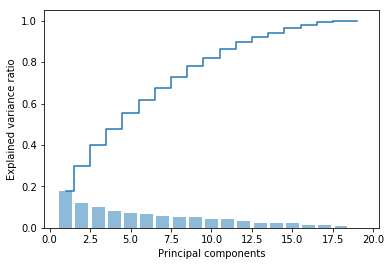

In [72]:
plt.bar(range(1, 20), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 20), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=6)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)


Test Accuracy: 0.507


In [191]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='weighted'))

Precision: 0.458
Recall: 0.507
F1: 0.433


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 1.Standarize the train and test set. 2.Using PCA to find the principle features which has the large covariance. 3. Choose the top 6 features because their explained variance ratio are over 60%. 4.Use the LogisticRegression model to predict based the 6 features selected.

# Task 4

The third task is to do clustering(using k-means). For this we will use the highly correlated features to cluster people into different absent reasons (The twelve reasons numbered between 0-28 and the value is given in the reason for absenteeism column). What you can do is pick a feature and plot the reason for absenteeism with respect to the feature. Then this will give you insight how many clusters are there, then do the clustering given the similar k that you had as in insight. This task is basically for you to learn about what things are, how clustering works, why is it useful. There is no right and wrong answer.

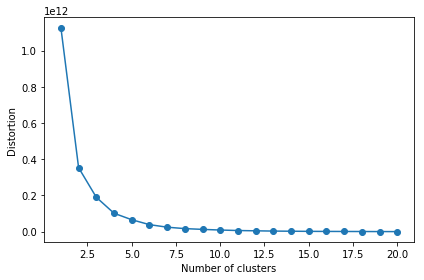

In [185]:
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [209]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(x)
y_km = kmeans.fit_predict(x)


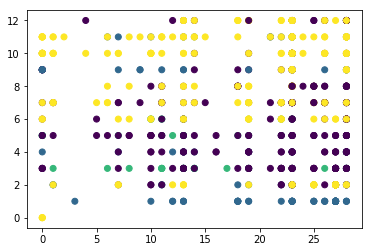

In [212]:
plt.scatter(x[:,0],x[:,1], c=kmeans.labels_); 
plt.show()

## 1.Find the relation between the number of clusters and distortion. 2. The elbow appears when n_clusters=4. 3. Use K-means model to clustering and set k=4. 
However, it seems there are no obvious clusters defined
